In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fdf2 = pd.read_csv('C:/Users/raclo/Documents/Bootcamp/Project 3/fdf2.csv', low_memory=False, sep=",")
fdf2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,distance,month,year,season,day_of_week,holiday,is_weekend,ride_duration
0,1,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,...,-77.072305,member,4.367593,1,2021,Winter,Friday,Yes,No,0 days 00:25:20
1,2,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,0,0,38.917193,-77.025894,...,-77.020000,casual,4.787179,1,2021,Winter,Friday,Yes,No,0 days 00:15:51
2,3,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,...,-77.031691,member,1.138843,1,2021,Winter,Friday,Yes,No,0 days 00:14:13
3,4,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,...,-77.114563,member,0.000000,1,2021,Winter,Friday,Yes,No,0 days 00:05:35
4,5,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,...,-77.032956,member,0.414050,1,2021,Winter,Friday,Yes,No,0 days 00:03:14


In [ ]:
fdf2.dtypes

ride_id                 int64
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
distance              float64
month                   int64
year                    int64
season                 object
day_of_week            object
holiday                object
is_weekend             object
ride_duration          object
dtype: object

In [4]:

# Convert categorical columns to category type for memory efficiency
fdf2["rideable_type"] = fdf2["rideable_type"].astype("category")
fdf2["start_station_name"] = fdf2["start_station_name"].astype("category")
fdf2["end_station_name"] = fdf2["end_station_name"].astype("category")
fdf2["member_casual"] = fdf2["member_casual"].astype("category")
fdf2["day_of_week"] = fdf2["day_of_week"].astype("category")
fdf2["holiday"] = fdf2["holiday"].astype("category")

# Convert started_at and ended_at to datetime for memory efficiency
fdf2['started_at'] = pd.to_datetime(fdf2['started_at'])
fdf2['ended_at'] = pd.to_datetime(fdf2['ended_at'])


fdf2['month'] = fdf2['month'].astype('int8')
fdf2["year"] = fdf2["year"].astype("str")

fdf2["ride_duration"] = pd.to_timedelta(fdf2["ride_duration"])

In [5]:
fdf2.dtypes

ride_id                         int64
rideable_type                category
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name           category
start_station_id               object
end_station_name             category
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                category
distance                      float64
month                            int8
year                           object
season                         object
day_of_week                  category
holiday                      category
is_weekend                     object
ride_duration         timedelta64[ns]
dtype: object

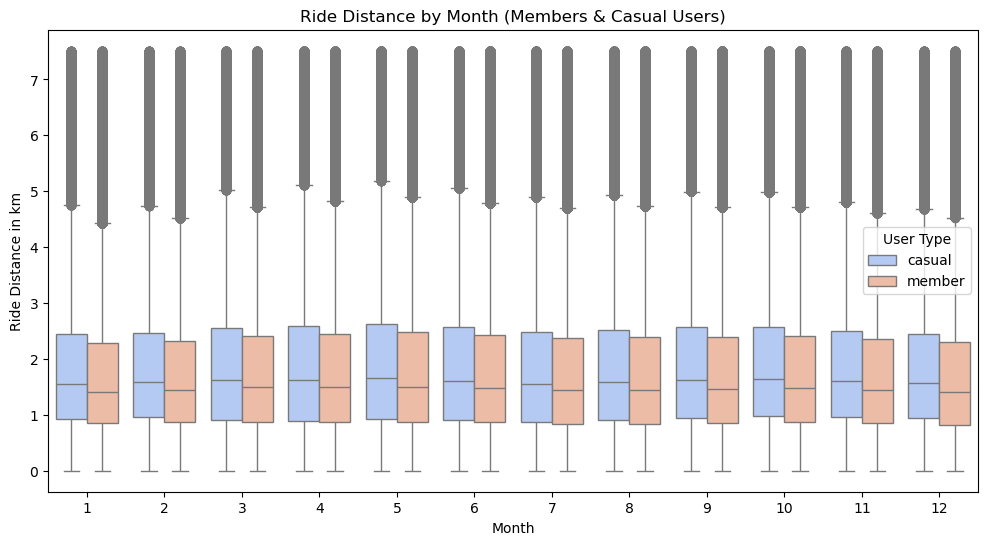

In [ ]:
# Plot Average Distance by Month (Member & Casual Users)

# Optional: Remove extreme outliers (99th percentile)
fdf2 = fdf2[fdf2['distance'] < fdf2['distance'].quantile(0.99)]

fdf2 = fdf2.dropna(subset=['distance'])

plt.figure(figsize=(12, 6))
sns.boxplot(x="month",
            y="distance",
            data=fdf2, 
            hue="member_casual", 
            palette="coolwarm"
            ) 

plt.xlabel("Month")
plt.ylabel("Ride Distance in km")
plt.title("Ride Distance by Month (Members & Casual Users)")
plt.legend(title="User Type") 
plt.show()

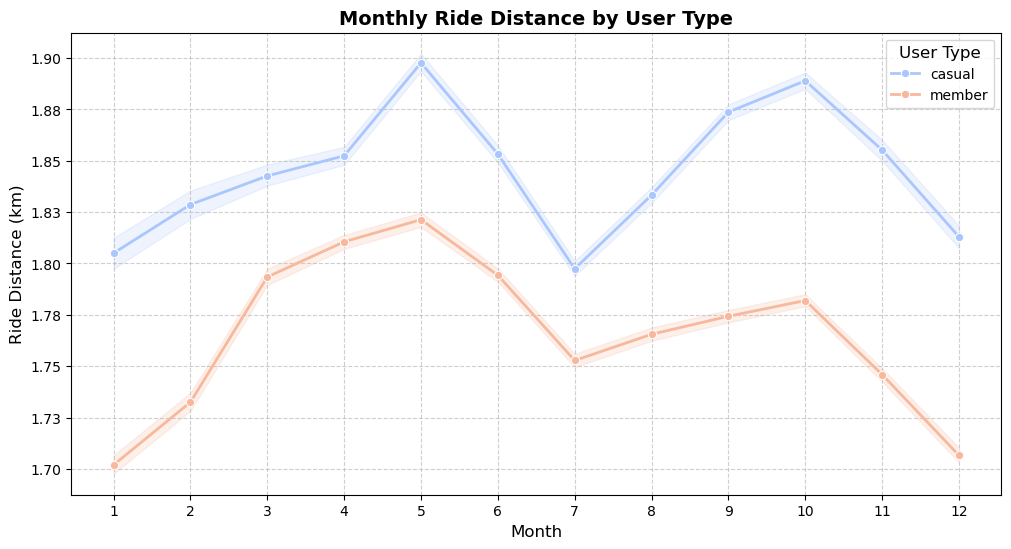

In [8]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 6))

# Create the line plot with improved visibility
sns.lineplot(x="month", 
            y="distance", 
            data=fdf2, 
            hue="member_casual", 
            palette="coolwarm", 
            marker="o",  # Adds markers for better readability
            linewidth=2  # Makes the lines more visible
            )  

# Ensure all months (1 to 12) are shown
plt.xticks(ticks=range(1, 13), labels=[str(i) for i in range(1, 13)])

# Format y-axis to show two decimals
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Add grid for better visualization
plt.grid(True, linestyle="--", alpha=0.6)  # Dashed grid lines with some transparency

# Improve labels and title
plt.xlabel("Month", fontsize=12)
plt.ylabel("Ride Distance (km)", fontsize=12)
plt.title("Monthly Ride Distance by User Type", fontsize=14, fontweight="bold")

# Improve legend
plt.legend(title="User Type", title_fontsize=12, fontsize=10, loc="upper right")

# Show the plot
plt.show()

In [9]:
fdf2["year"] = fdf2["year"].astype(str)

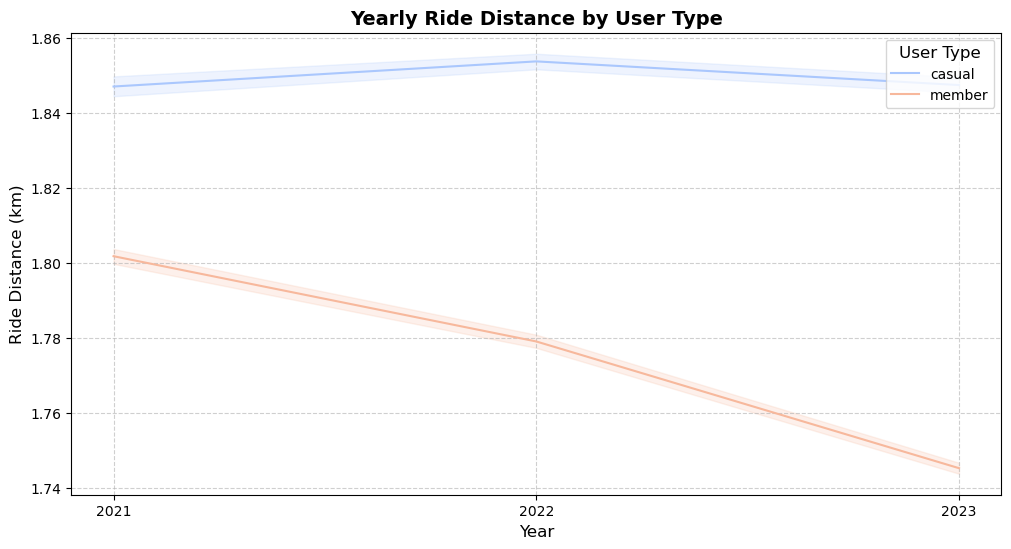

In [10]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 6))

# Create the line plot with improved visibility
sns.lineplot(x="year", 
            y="distance", 
            data=fdf2, 
            hue="member_casual", 
            palette="coolwarm", 
            # marker="o",  # Adds markers for better readability
            # linewidth=2  # Makes the lines more visible
            )  


# # Format y-axis to show two decimals
# plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Add grid for better visualization
plt.grid(True, linestyle="--", alpha=0.6)  # Dashed grid lines with some transparency

# Improve labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Ride Distance (km)", fontsize=12)
plt.title("Yearly Ride Distance by User Type", fontsize=14, fontweight="bold")

# Improve legend
plt.legend(title="User Type", title_fontsize=12, fontsize=10, loc="upper right")

# Show the plot
plt.show()

In [ ]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 6))

# Create the line plot with improved visibility
sns.lineplot(x="year", 
            y="distance", 
            data=fdf2, 
            hue="member_casual", 
            palette="coolwarm", 
            # marker="o",  # Adds markers for better readability
            # linewidth=2  # Makes the lines more visible
            )  


# # Format y-axis to show two decimals
# plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Add grid for better visualization
plt.grid(True, linestyle="--", alpha=0.6)  # Dashed grid lines with some transparency

# Improve labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Ride Distance (km)", fontsize=12)
plt.title("Yearly Ride Distance by User Type", fontsize=14, fontweight="bold")

# Improve legend
plt.legend(title="User Type", title_fontsize=12, fontsize=10, loc="upper right")

# Show the plot
plt.show()

In [11]:
fdf2["year"] = fdf2["year"].astype(str)

In [6]:
# Convert ride_duration to minutes before filtering
fdf2["ride_duration_min"] = fdf2["ride_duration"].dt.total_seconds() / 60

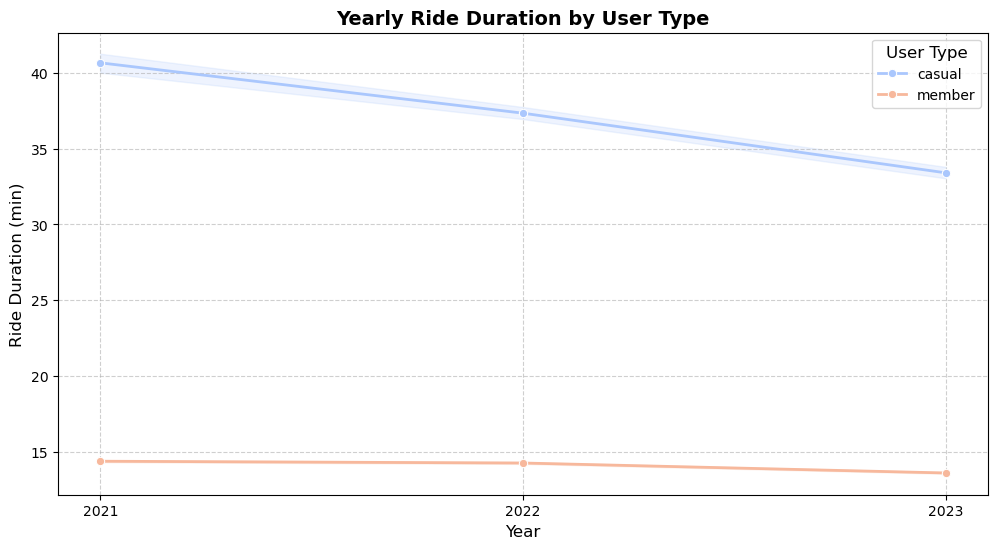

In [8]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 6))

# Create the line plot with improved visibility
sns.lineplot(x="year", 
            y="ride_duration_min", 
            data=fdf2, 
            hue="member_casual", 
            palette="coolwarm", 
            marker="o",  # Adds markers for better readability
            linewidth=2  # Makes the lines more visible
            )  


# # Format y-axis to show two decimals
# plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Add grid for better visualization
plt.grid(True, linestyle="--", alpha=0.6)  # Dashed grid lines with some transparency

# Improve labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Ride Duration (min)", fontsize=12)
plt.title("Yearly Ride Duration by User Type", fontsize=14, fontweight="bold")

# Improve legend
plt.legend(title="User Type", title_fontsize=12, fontsize=10, loc="upper right")

# Show the plot
plt.show()

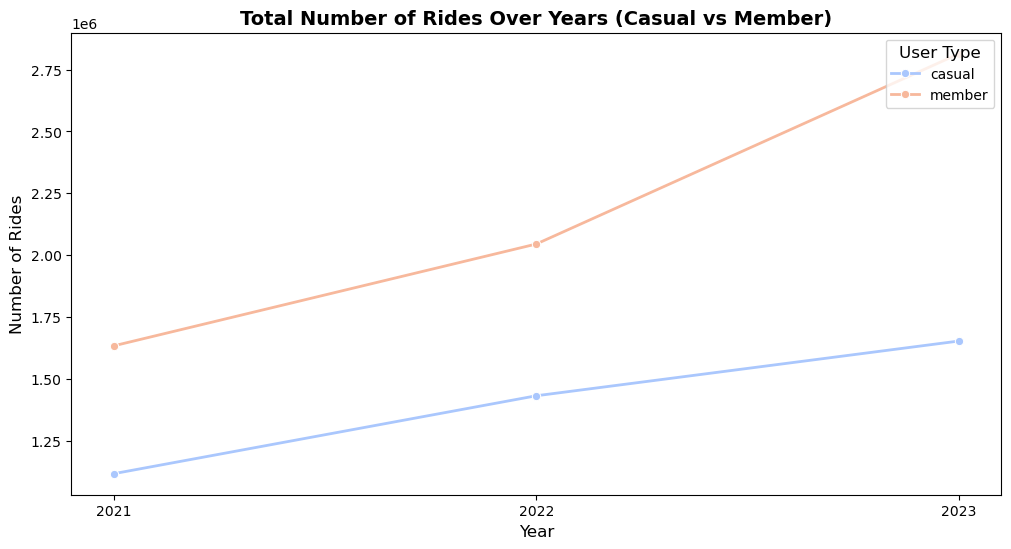

In [12]:
# Group by year and member_casual to get the count of rides
rides_per_year = fdf2.groupby(['year', 'member_casual'], observed=False).size().reset_index(name='ride_count')

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='ride_count', hue='member_casual', data=rides_per_year, marker='o', linewidth=2, palette='coolwarm')

# Improve labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.title("Total Number of Rides Over Years (Casual vs Member)", fontsize=14, fontweight="bold")

# Improve legend
plt.legend(title="User Type", title_fontsize=12, fontsize=10, loc="upper right")

# Show the plot
plt.show()

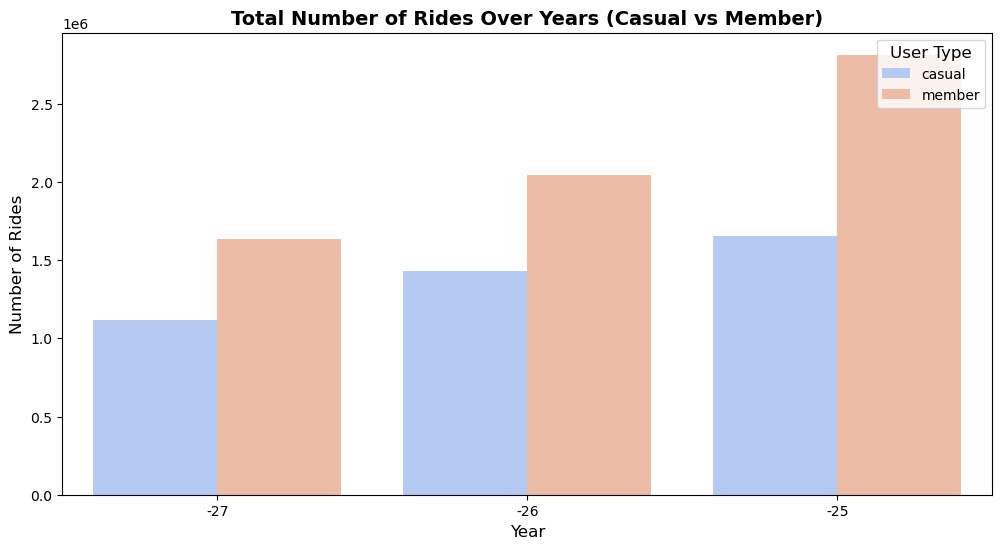

In [16]:
# Group by year and member_casual to get the count of rides
rides_per_year = fdf2.groupby(['year', 'member_casual'], observed=False).size().reset_index(name='ride_count')

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='ride_count', hue='member_casual', palette='coolwarm', data=rides_per_year)

# Improve labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.title("Total Number of Rides Over Years (Casual vs Member)", fontsize=14, fontweight="bold")

# Improve legend
plt.legend(title="User Type", title_fontsize=12, fontsize=10, loc="upper right")

# Show the plot
plt.show()


In [12]:
fdf2["distance"].describe()

count    1.058706e+07
mean     1.801167e+00
std      1.319893e+00
min      0.000000e+00
25%      8.736202e-01
50%      1.513579e+00
75%      2.450765e+00
max      7.514854e+00
Name: distance, dtype: float64

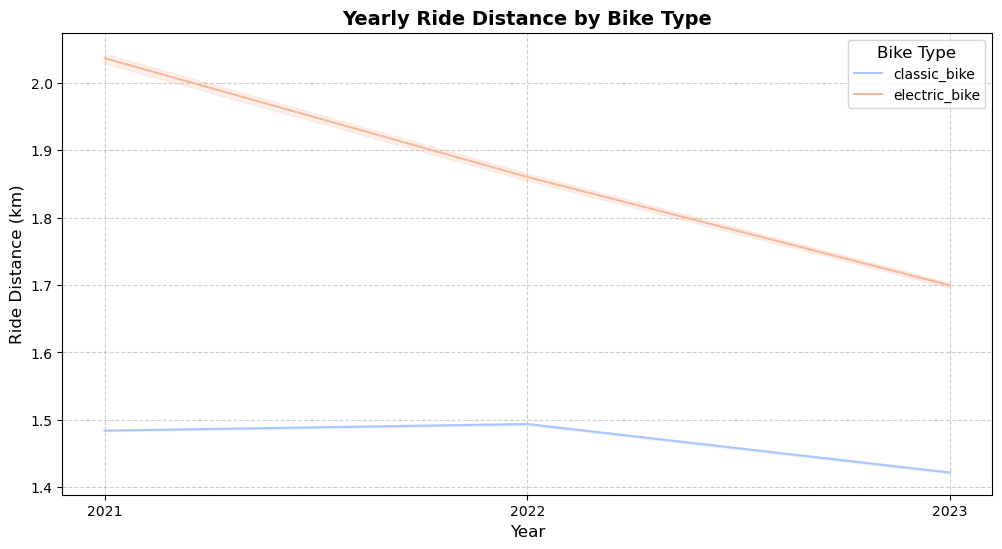

In [13]:
# Ride Duration by Year (Casual vs Member)

from matplotlib.ticker import FuncFormatter

# Filter the data to exclude "docked_bike" from the "rideable_type" column
filtered_fdf2 = fdf2[fdf2["rideable_type"] != "docked_bike"]

plt.figure(figsize=(12, 6))

# Create the line plot
sns.lineplot(x="year", 
            y="distance", 
            data=filtered_fdf2, 
            hue="rideable_type",
            hue_order=["classic_bike", "electric_bike"], 
            palette="coolwarm", 
            estimator=np.median  # Use median instead of mean
            # marker="o",  # Adds markers for better readability
            # linewidth=2  # Makes the lines more visible
            )  

# Add grid for better visualization
plt.grid(True, linestyle="--", alpha=0.6)  # Dashed grid lines with some transparency

# Improve labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Ride Distance (km)", fontsize=12)
plt.title("Yearly Ride Distance by Bike Type", fontsize=14, fontweight="bold")

# Improve legend
plt.legend(title="Bike Type", title_fontsize=12, fontsize=10, loc="upper right")

# Show the plot
plt.show()

In [14]:
fdf2.nlargest(10, "distance")


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,distance,month,year,season,day_of_week,holiday,is_weekend,ride_duration
5063587,5063588,electric_bike,2022-08-31 13:01:53,2022-08-31 13:54:53,0,0,0,0,38.990000,-77.030000,...,-77.070000,member,7.514854,8,2022,Summer,Wednesday,No,No,0 days 00:53:00
7248014,7248015,electric_bike,2023-04-24 17:05:08,2023-04-24 17:39:48,0,0,0,0,38.990000,-77.030000,...,-77.070000,casual,7.514854,4,2023,Spring,Monday,No,No,0 days 00:34:40
1398540,1398541,classic_bike,2021-07-31 11:52:09,2021-07-31 12:32:07,Kansas Ave & Sherman Cr NW,31417.0,Maine Ave & 9th St SW,31646.0,38.947962,-77.021550,...,-77.025236,casual,7.514847,7,2021,Summer,Saturday,No,Yes,0 days 00:39:58
2202415,2202416,classic_bike,2021-10-20 20:23:40,2021-10-20 21:05:54,Maine Ave & 9th St SW,31646.0,Kansas Ave & Sherman Cr NW,31417.0,38.880440,-77.025236,...,-77.021550,member,7.514847,10,2021,Autumn,Wednesday,No,No,0 days 00:42:14
2878883,2878884,classic_bike,2022-02-05 15:32:38,2022-02-05 16:02:35,Kansas Ave & Sherman Cr NW,31417.0,Maine Ave & 9th St SW,31646.0,38.947962,-77.021550,...,-77.025236,member,7.514847,2,2022,Winter,Saturday,No,Yes,0 days 00:29:57
3692938,3692939,classic_bike,2022-05-13 09:01:11,2022-05-13 09:56:48,Kansas Ave & Sherman Cr NW,31417.0,Maine Ave & 9th St SW,31646.0,38.947962,-77.021550,...,-77.025236,casual,7.514847,5,2022,Spring,Friday,No,No,0 days 00:55:37
3692939,3692940,classic_bike,2022-05-13 09:01:11,2022-05-13 09:56:48,Kansas Ave & Sherman Cr NW,31417.0,Maine Ave & 9th St SW,31646.0,38.947962,-77.021550,...,-77.025236,casual,7.514847,5,2022,Spring,Friday,No,No,0 days 00:55:37
3692946,3692947,classic_bike,2022-05-13 09:02:19,2022-05-13 09:56:47,Kansas Ave & Sherman Cr NW,31417.0,Maine Ave & 9th St SW,31646.0,38.947962,-77.021550,...,-77.025236,casual,7.514847,5,2022,Spring,Friday,No,No,0 days 00:54:28
3986769,3986770,classic_bike,2022-06-06 23:01:59,2022-06-06 23:43:22,Maine Ave & 9th St SW,31646.0,Kansas Ave & Sherman Cr NW,31417.0,38.880440,-77.025236,...,-77.021550,member,7.514847,6,2022,Summer,Monday,No,No,0 days 00:41:23
3986772,3986773,classic_bike,2022-06-06 23:02:36,2022-06-06 23:43:10,Maine Ave & 9th St SW,31646.0,Kansas Ave & Sherman Cr NW,31417.0,38.880440,-77.025236,...,-77.021550,casual,7.514847,6,2022,Summer,Monday,No,No,0 days 00:40:34


In [15]:
fdf2["ride_duration"] = pd.to_timedelta(fdf2["ride_duration"])

In [16]:
# Convert ride_duration to minutes before filtering
fdf2["ride_duration_min"] = fdf2["ride_duration"].dt.total_seconds() / 60

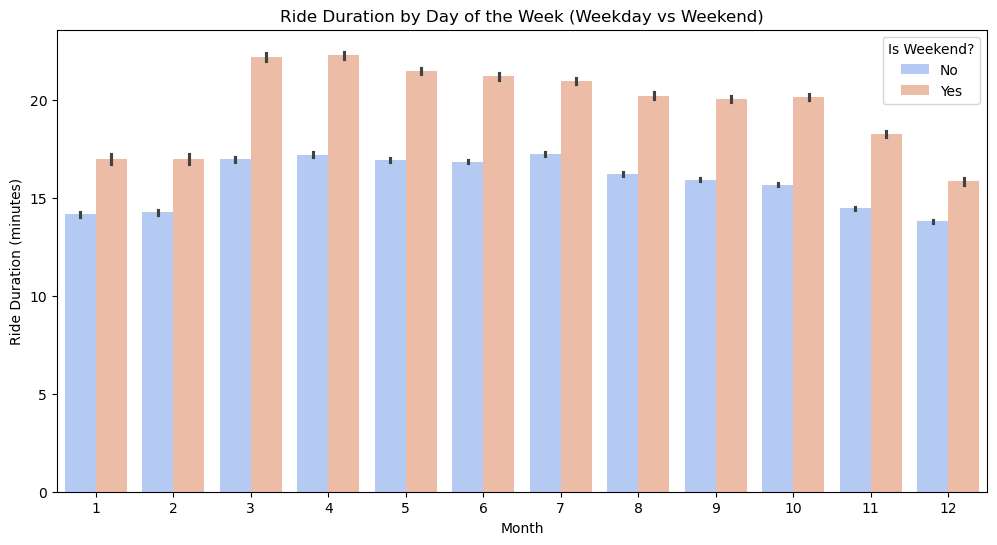

In [17]:
# Ride duration by Month

# Filter the data to exclude "docked_bike" from the "rideable_type" column
filtered_fdf2 = fdf2[fdf2["rideable_type"] != "docked_bike"]

# Create the plot
plt.figure(figsize=(12, 6))

sns.barplot(x="month", 
            y="ride_duration_min", 
            data=filtered_fdf2, 
            hue="is_weekend", 
            palette="coolwarm", 
            ) 

plt.xlabel("Month")
plt.ylabel("Ride Duration (minutes)")
plt.title("Ride Duration by Day of the Week (Weekday vs Weekend)")
plt.legend(title="Is Weekend?")  
plt.show()

In [18]:
# Ride duration by Year

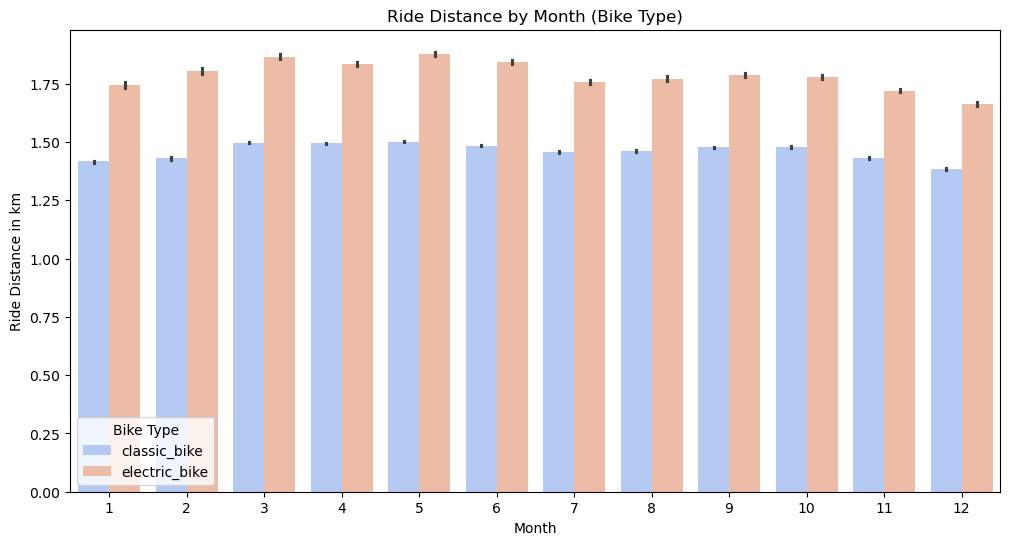

In [19]:
# Plot Average Distance by Month (Member & Casual Users)

# Filter the data to exclude "docked_bike" from the "rideable_type" column
fdf2_filtered = fdf2[fdf2["rideable_type"] != "docked_bike"]

plt.figure(figsize=(12, 6))
sns.barplot(x="month",
            y="distance",
            data=fdf2_filtered, 
            hue="rideable_type",
            hue_order=["classic_bike", "electric_bike"], 
            palette="coolwarm",
            estimator=np.median
            ) 

plt.xlabel("Month")
plt.ylabel("Ride Distance in km")
plt.title("Ride Distance by Month (Bike Type)")
plt.legend(title="Bike Type")  

# # Ensure all months (1 to 12) are shown
# plt.xticks(ticks=range(1, 13), labels=[str(i) for i in range(1, 13)])

plt.show()


In [20]:
# Define the correct order of days
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# Convert 'day_of_week' to an ordered categorical type
fdf2["day_of_week"] = pd.Categorical(fdf2["day_of_week"], categories=day_order, ordered=True)

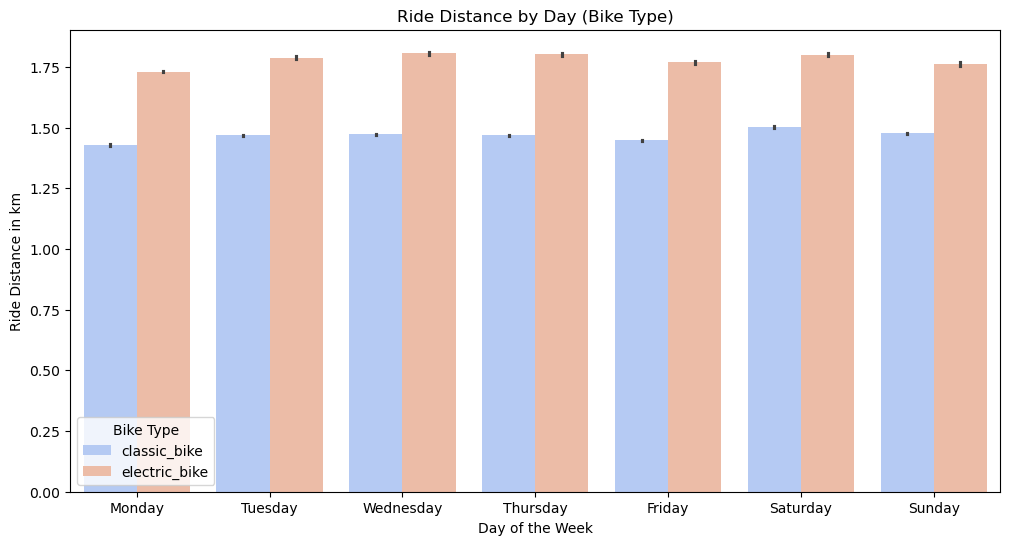

In [21]:
# Plot Average Distance by Week Day (Member & Casual Users)

# Filter the data to exclude "docked_bike" from the "rideable_type" column
fdf2_filtered = fdf2[fdf2["rideable_type"] != "docked_bike"]

plt.figure(figsize=(12, 6))
sns.barplot(x="day_of_week",
            y="distance",
            data=fdf2_filtered, 
            hue="rideable_type",
            hue_order=["classic_bike", "electric_bike"],
            palette="coolwarm",
            estimator=np.median
            ) 

plt.xlabel("Day of the Week")
plt.ylabel("Ride Distance in km")
plt.title("Ride Distance by Day (Bike Type)")
plt.legend(title="Bike Type")  

plt.show()


In [22]:

# Convert categorical columns to category type for memory efficiency
fdf2["rideable_type"] = fdf2["rideable_type"].astype("category")
fdf2["start_station_name"] = fdf2["start_station_name"].astype("category")
fdf2["end_station_name"] = fdf2["end_station_name"].astype("category")
fdf2["member_casual"] = fdf2["member_casual"].astype("category")
fdf2["day_of_week"] = fdf2["day_of_week"].astype("category")
fdf2["holiday"] = fdf2["holiday"].astype("category")

# Convert started_at and ended_at to datetime for memory efficiency
fdf2['started_at'] = pd.to_datetime(fdf2['started_at'])
fdf2['ended_at'] = pd.to_datetime(fdf2['ended_at'])


fdf2['month'] = fdf2['month'].astype('int8')
fdf2["year"] = fdf2["year"].astype("str")

fdf2["ride_duration"] = pd.to_timedelta(fdf2["ride_duration"])

In [23]:
fdf2.dtypes

ride_id                         int64
rideable_type                category
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name           category
start_station_id               object
end_station_name             category
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                category
distance                      float64
month                            int8
year                           object
season                         object
day_of_week                  category
holiday                      category
is_weekend                     object
ride_duration         timedelta64[ns]
ride_duration_min             float64
dtype: object

In [24]:
fdf2["year"] = fdf2["year"].astype("category")

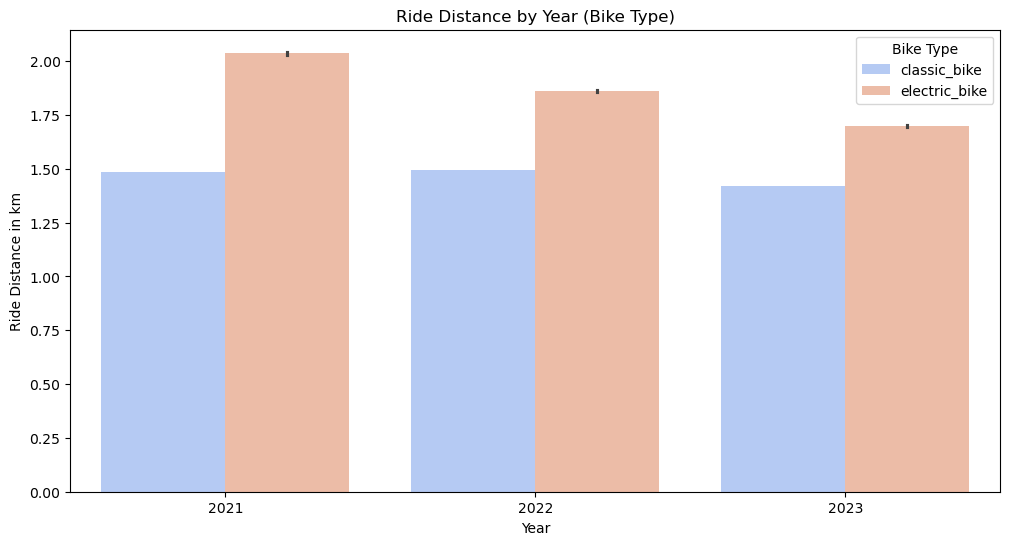

In [25]:
# import dask.dataframe as dd

# # Load the data as a Dask dataframe
# fdf2_dask = dd.from_pandas(fdf2, npartitions=10)

# # Filter the data to exclude "docked_bike" from the "rideable_type" column
# fdf2_filtered_dask = fdf2_dask[fdf2_dask["rideable_type"] != "docked_bike"]

# # Compute the filtered dataframe
# fdf2_filtered = fdf2_filtered_dask.compute()

fdf2_filtered = fdf2[fdf2["rideable_type"] != "docked_bike"]

plt.figure(figsize=(12, 6))
sns.barplot(x="year",
            y="distance",
            data=fdf2_filtered, 
            hue="rideable_type",
            hue_order=["classic_bike", "electric_bike"],
            palette="coolwarm",
            estimator=np.median
            ) 

plt.xlabel("Year")
plt.ylabel("Ride Distance in km")
plt.title("Ride Distance by Year (Bike Type)")
plt.legend(title="Bike Type")  

plt.show()


In [27]:
# Load the full dataset
fdf2 = pd.read_csv("fdf2.csv", low_memory=False)

# Filter for the year 2023
fdf_2023 = fdf2[fdf2["year"] == 2023]

# Save to a new file
fdf_2023.to_csv("CBS_2023.csv", index=False)

print(f"Filtered dataset for 2023 saved with {len(fdf_2023)} rows.")


KeyboardInterrupt: 

In [ ]:
# Take a 25% random sample
fdf_2023_sampled = fdf_2023.sample(frac=0.25, random_state=42)

# Save to a new file
fdf_2023_sampled.to_csv("CBS_2023_sample.csv", index=False)

print(f"Sampled dataset for 2023 saved with {len(fdf_2023_sampled)} rows.")


Sampled dataset for 2023 saved with 1116834 rows.


In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
fdf2.nlargest(100, "distance")[["started_at", "ended_at", "start_station_name", 
                               "start_station_id", "end_station_name", 
                               "end_station_id", "ride_duration", "ride_duration_min", "distance"]]

,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,ride_duration,ride_duration_min,distance
8294575,2023-07-08 16:54:54,2023-07-09 09:26:57,Reston YMCA,32219.0,0,0,0 days 16:32:03,992.050000,8918.835389
9055391,2023-08-28 07:04:54,2023-08-29 08:04:49,Reston YMCA,32219.0,0,0,1 days 00:59:55,1499.916667,8918.835389
2566223,2021-12-01 20:54:27,2021-12-02 21:54:22,Green Range Dr and Glade Dr,32249.0,0,0,1 days 00:59:55,1499.916667,8918.506692
3793019,2022-05-21 17:00:32,2022-05-22 18:00:32,Green Range Dr and Glade Dr,32249.0,0,0,1 days 01:00:00,1500.000000,8918.506652
3170093,2022-03-20 16:35:33,2022-03-21 17:35:27,South Gate Community Center,32250.0,0,0,1 days 00:59:54,1499.900000,8918.456876
...,...,...,...,...,...,...,...,...,...
5036229,2022-08-28 19:29:29,2022-08-29 20:29:25,Sunset Hills Rd & Isaac Newton Square,32220.0,0,0,1 days 00:59:56,1499.933333,8916.374458
5312790,2022-09-19 17:42:06,2022-09-23 04:56:52,Sunset Hills Rd & Isaac Newton Square,32220.0,0,0,3 days 11:14:46,4994.766667,8916.374458
5362872,2022-09-23 13:55:02,2022-09-24 14:54:55,Sunset Hills Rd & Isaac Newton Square,32220.0,0,0,1 days 00:59:53,1499.883333,8916.374458
5579960,2022-10-13 12:07:47,2022-10-14 13:07:41,Sunset Hills Rd & Isaac Newton Square,32220.0,0,0,1 days 00:59:54,1499.900000,8916.374458


In [ ]:
fdf2.nsmallest(100, "distance")[["started_at", "ended_at", "start_station_name", 
                               "start_station_id", "end_station_name", 
                               "end_station_id", "ride_duration", "ride_duration_min", "distance"]]


,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,ride_duration,ride_duration_min,distance
3,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,0 days 00:05:35,5.583333,0.0
10,2021-01-01 00:23:05,2021-01-01 00:37:02,Lincoln Park / 13th & East Capitol St NE,31619.0,Lincoln Park / 13th & East Capitol St NE,31619.0,0 days 00:13:57,13.950000,0.0
20,2021-01-01 00:27:18,2021-01-01 00:34:30,0,0,0,0,0 days 00:07:12,7.200000,0.0
22,2021-01-01 00:32:44,2021-01-01 00:32:51,0,0,0,0,0 days 00:00:07,0.116667,0.0
40,2021-01-01 00:53:45,2021-01-01 00:54:47,Rhode Island Ave Metro,31516.0,Rhode Island Ave Metro,31516.0,0 days 00:01:02,1.033333,0.0
...,...,...,...,...,...,...,...,...,...
1046,2021-01-02 07:25:28,2021-01-02 07:25:32,0,0,0,0,0 days 00:00:04,0.066667,0.0
1053,2021-01-02 07:34:58,2021-01-02 07:53:07,Hains Point/Buckeye & Ohio Dr SW,31273.0,Hains Point/Buckeye & Ohio Dr SW,31273.0,0 days 00:18:09,18.150000,0.0
1058,2021-01-02 07:39:38,2021-01-02 09:54:25,18th St & Pennsylvania Ave NW,31242.0,18th St & Pennsylvania Ave NW,31242.0,0 days 02:14:47,134.783333,0.0
1068,2021-01-02 07:45:27,2021-01-02 09:54:04,18th St & Pennsylvania Ave NW,31242.0,18th St & Pennsylvania Ave NW,31242.0,0 days 02:08:37,128.616667,0.0


In [1]:
# Check for missing results in the 'end_station_name' column
zero_end_stations = (fdf2["end_station_name"] == "0").sum()
print(f"Number of rows with '0' in end_station_name: {zero_end_stations}")


NameError: name 'fdf2' is not defined

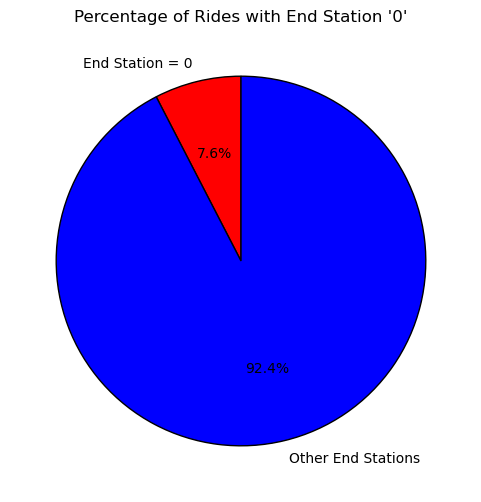

In [87]:
import matplotlib.pyplot as plt

# Count occurrences
zero_count = (fdf2["end_station_name"] == "0").sum()
non_zero_count = len(fdf2) - zero_count

# Labels and sizes
labels = ["End Station = 0", "Other End Stations"]
sizes = [zero_count, non_zero_count]
colors = ["red", "blue"]

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Percentage of Rides with End Station '0'")
plt.show()


In [ ]:
# Check occurences of 0 distance rides
zero_distance_count = (fdf2["distance"] == 0).sum()
print(f"Number of rows with distance = 0: {zero_distance_count}")


Number of rows with distance = 0: 639144


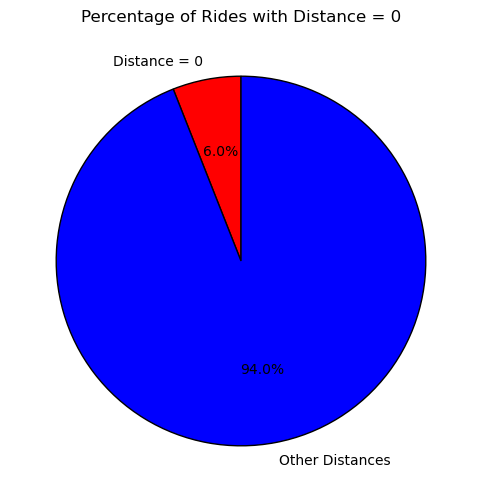

In [89]:
import matplotlib.pyplot as plt

# Count occurrences
zero_distance_count = (fdf2["distance"] == 0).sum()
non_zero_distance_count = len(fdf2) - zero_distance_count

# Labels and sizes
labels = ["Distance = 0", "Other Distances"]
sizes = [zero_distance_count, non_zero_distance_count]
colors = ["red", "blue"]

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Percentage of Rides with Distance = 0")
plt.show()


In [105]:
# Check rides where end time is prior to start time
negative_duration = fdf2[fdf2["ride_duration"] < pd.Timedelta(0)]

# Return the number of rows with negative ride duration
negative_duration_count = len(negative_duration)

print(f"Number of rides with negative duration: {negative_duration_count}")
negative_duration.tail()

Number of rides with negative duration: 1052


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance,month,year,season,day_of_week,holiday,is_weekend,ride_duration,ride_duration_min
10662143,10662144,electric_bike,2023-12-27 21:15:28,2023-12-27 21:15:26,0,0,0,0,38.89,-77.03,38.89,-77.03,member,0.0,12,2023,Winter,Wednesday,No,No,-1 days +23:59:58,-0.033333
10670827,10670828,electric_bike,2023-12-29 07:05:49,2023-12-29 07:05:48,0,0,0,0,38.96,-77.00,38.96,-77.00,casual,0.0,12,2023,Winter,Friday,No,No,-1 days +23:59:59,-0.016667
10674867,10674868,electric_bike,2023-12-29 14:59:03,2023-12-29 14:58:53,0,0,0,0,38.97,-77.03,38.97,-77.03,member,0.0,12,2023,Winter,Friday,No,No,-1 days +23:59:50,-0.166667
10675859,10675860,electric_bike,2023-12-29 16:04:04,2023-12-29 16:04:03,0,0,0,0,38.90,-77.02,38.90,-77.02,casual,0.0,12,2023,Winter,Friday,No,No,-1 days +23:59:59,-0.016667
10684989,10684990,electric_bike,2023-12-30 17:52:51,2023-12-30 17:52:45,0,0,0,0,38.90,-76.99,38.90,-76.99,casual,0.0,12,2023,Winter,Saturday,No,Yes,-1 days +23:59:54,-0.100000


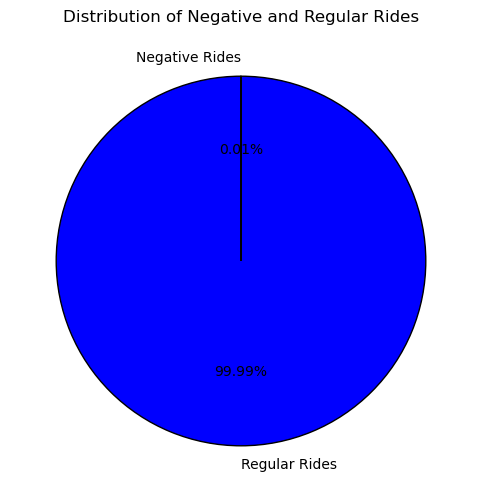

In [101]:
import matplotlib.pyplot as plt

# Count occurrences of negative rides
negative_ride_count = len(negative_duration)

# Count regular (non-negative) rides
regular_ride_count = len(fdf2) - negative_ride_count

# Labels and sizes
labels = ["Negative Rides", "Regular Rides"]
sizes = [negative_ride_count, regular_ride_count]
colors = ["red", "blue"]

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.2f%%", colors=colors, startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Distribution of Negative and Regular Rides")
plt.show()


In [107]:
print(f"Number of rows before cleaning: {len(fdf2)}")

Number of rows before cleaning: 10693997


In [108]:
# Drop rows where ride_duration is negative (1052)

fdf2 = fdf2[fdf2["ride_duration"] >= pd.Timedelta(0)]

# Verify the result
print(f"Number of rows after cleaning: {len(fdf2)}")


Number of rows after cleaning: 10692945


In [109]:
# Overwrite fdf2 by dropping rows where 'end_station_name' is '0'
fdf2 = fdf2[fdf2["end_station_name"] != "0"]

# Verify the result
print(f"Number of rows after cleaning: {len(fdf2)}")


Number of rows after cleaning: 9881842


In [110]:
# Overwrite fdf2 by dropping rows where "ride_distance" is 0
fdf2 = fdf2[fdf2["distance"] != 0]

# Verify the result
print(f"Number of rows after cleaning: {len(fdf2)}")


Number of rows after cleaning: 9370545


In [121]:
# Filter rows with 0 minute duration
zero_duration_rides = fdf2[fdf2["ride_duration_min"] == 0]

# Optionally, check the total number of these rows
zero_duration_count = len(zero_duration_rides)
print(f"Number of rows with 0 min ride duration: {zero_duration_count}")

zero_duration_rides.head()


Number of rows with 0 min ride duration: 253


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance,month,year,season,day_of_week,holiday,is_weekend,ride_duration,ride_duration_min
94490,94491,electric_bike,2021-01-29 18:42:11,2021-01-29 18:42:11,East Falls Church Metro / Sycamore St & 19th St N,31904.0,East Falls Church Metro / Sycamore St & 19th St N,31904.0,38.885544,-77.156495,38.885549,-77.156496,casual,0.000618,1,2021,Winter,Friday,No,No,0 days,0.0
476700,476701,electric_bike,2021-04-17 23:43:58,2021-04-17 23:43:58,Eads St & 12th St S,31071.0,Eads St & 12th St S,31071.0,38.862669,-77.054342,38.862707,-77.054268,casual,0.007617,4,2021,Spring,Saturday,No,Yes,0 days,0.0
638737,638738,electric_bike,2021-05-10 19:10:51,2021-05-10 19:10:51,Eckington Pl & Q St NE,31505.0,Eckington Pl & Q St NE,31505.0,38.910818,-77.004952,38.910807,-77.004936,casual,0.001778,5,2021,Spring,Monday,No,No,0 days,0.0
895300,895301,electric_bike,2021-06-09 18:54:46,2021-06-09 18:54:46,10th & U St NW,31111.0,10th & U St NW,31111.0,38.917183,-77.025891,38.917190,-77.025937,member,0.004084,6,2021,Summer,Wednesday,No,No,0 days,0.0
965580,965581,electric_bike,2021-06-17 18:56:38,2021-06-17 18:56:38,Nannie Helen Burroughs & Minnesota Ave NE,31704.0,Nannie Helen Burroughs & Minnesota Ave NE,31704.0,38.901387,-76.941893,38.901389,-76.941905,member,0.001066,6,2021,Summer,Thursday,No,No,0 days,0.0


In [123]:
# Drop rows where ride_duration_min is 0
fdf2 = fdf2[fdf2["ride_duration_min"] != 0]

# Optionally, check the result
print(f"Number of rows after cleaning: {len(fdf2)}")


Number of rows after cleaning: 9370292


In [124]:
fdf2.describe()

,ride_id,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,distance,month,ride_duration,ride_duration_min
count,9.370292e+06,9370292,9370292,9.370292e+06,9.370292e+06,9.370292e+06,9.370292e+06,9.370292e+06,9.370292e+06,9370292,9.370292e+06
mean,5.334775e+06,2022-09-13 07:48:19.290510336,2022-09-13 08:07:28.692106240,3.890282e+01,-7.703180e+01,3.890165e+01,-7.703138e+01,1.973494e+00,7.002321e+00,0 days 00:19:09.401597516,1.915669e+01
min,1.000000e+00,2021-01-01 00:08:33,2021-01-01 00:21:00,3.876000e+01,-7.740000e+01,0.000000e+00,-7.736845e+01,9.770578e-06,1.000000e+00,0 days 00:00:01,1.666667e-02
25%,2.726668e+06,2021-12-26 21:00:56,2021-12-26 21:21:35.500000,3.889054e+01,-7.704460e+01,3.889054e+01,-7.704460e+01,9.867718e-01,5.000000e+00,0 days 00:06:46,6.766667e+00
50%,5.327492e+06,2022-09-20 18:30:04,2022-09-20 18:46:39.500000,3.890273e+01,-7.703174e+01,3.890231e+01,-7.703174e+01,1.614998e+00,7.000000e+00,0 days 00:11:24,1.140000e+01
75%,7.938663e+06,2023-06-13 19:24:41.249999872,2023-06-13 19:39:41,3.891305e+01,-7.701377e+01,3.891259e+01,-7.701367e+01,2.542375e+00,9.000000e+00,0 days 00:19:27,1.945000e+01
max,1.069400e+07,2023-12-31 23:59:27,2024-01-01 15:24:35,3.913000e+01,-7.682000e+01,3.912583e+01,0.000000e+00,8.890599e+03,1.200000e+01,37 days 21:00:28,5.454047e+04
std,3.042717e+06,NaN,NaN,2.505720e-02,3.162942e-02,5.047376e-02,9.262330e-02,1.015953e+01,3.012243e+00,0 days 02:15:38.575776825,1.356429e+02


In [126]:
# Save the cleaned dataframe to a CSV file (after having removed unnecessary columns)
fdf2.to_csv("cleaned_fdf2.csv", index=False)

print("Cleaned DataFrame saved as 'cleaned_fdf2.csv'")


Cleaned DataFrame saved as 'cleaned_fdf2.csv'


In [2]:
# Check for missing results in the 'start_station_name' column
zero_end_stations = (fdf2["end_station_name"] == "0").sum()
print(f"Number of rows with '0' in end_station_name: {zero_end_stations}")

NameError: name 'fdf2' is not defined